# Lead Score - Case Study

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Cheking provided data set

## 1.1. Reading and inspecting data

In [106]:
#Reading file and storing as pandas dataframe
df_leads = pd.read_csv('Leads.csv')
df_leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [107]:
#Checking data type of each column
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [108]:
#To get the idea of how the table looks like we can use .head() or .tail() command
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [109]:
df_leads.shape
#There are 9240 rows and 37 columns in this dataset

(9240, 37)

In [110]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 1.2. Data Cleansing

In [111]:
# Converting all the data to lower case
df_leads = df_leads.applymap(lambda s:s.lower() if type(s) == str else s)

In [112]:
# Replacing value as'Select' with NaN as it looks like there was an option and nothing was selected.
df_leads = df_leads.replace('select',np.nan)

In [113]:
# Checking the percentage of missing values
round((df_leads.isnull().sum()/len(df_leads)), 2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [114]:
# Dropping columns that have 40% or more null values
df_leads_1 = df_leads.drop(['How did you hear about X Education','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)
df_leads_1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,no,interested in other courses,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,no,ringing,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,student,better career prospects,no,no,no,no,no,no,no,no,will revert after reading the email,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,unemployed,better career prospects,no,no,no,no,no,no,no,no,ringing,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,no,will revert after reading the email,no,no,no,no,modified


In [115]:
# Checking the percentage of missing values post drop
round((df_leads_1.isnull().sum()/len(df_leads_1)), 2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [116]:
# Removing prospect ID since the values are unique for all
df_leads_1 = df_leads_1.drop('Prospect ID',1)
df_leads_1.shape

(9240, 28)

In [117]:
# Checking and dropping columns which have single unique values as they won't impact our analysis.
df_leads_1.nunique()

Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [118]:
#Dropping unique value columns with count 1
df_leads_2= df_leads_1.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'],axis=1)

In [119]:
df_leads_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [120]:
#To handle columns with less than 40% but closer to 40%, since they are important attributes replacing NaN
#values with a string 'No info' as these were not provided.
df_leads_2['Country'] = df_leads_2['Country'].fillna('No info')
df_leads_2['Specialization'] = df_leads_2['Specialization'].fillna('No info') 
df_leads_2['What matters most to you in choosing a course'] = df_leads_2['What matters most to you in choosing a course'].fillna('No info')
df_leads_2['What is your current occupation'] = df_leads_2['What is your current occupation'].fillna('No info')
df_leads_2['Tags'] = df_leads_2['Tags'].fillna('No info')

In [121]:
# Checking the percentage of missing values post impute
round((df_leads_1.isnull().sum()/len(df_leads_1)), 2)*100

Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

In [122]:
# Checking the percent of data loss if the null values are removed
round((sum(df_leads_2.isnull().sum(axis=1) > 1)/df_leads_2.shape[0]),2)*100
# 1 percent data loss..

1.0

In [123]:
# There is just 1% data loss, hence removing those as well.
df_leads_3 = df_leads_2[df_leads_2.isnull().sum(axis=1) <1]

In [124]:
# Checking the percentage of missing values post impute
round((df_leads_3.isnull().sum()/len(df_leads_3)), 2)*100

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [125]:
df_leads_final = df_leads_3.copy()

In [126]:
#final dataframe
df_leads_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

In [127]:
df_leads_final.reset_index(inplace = True)
df_leads_final.head()

,index,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,0,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,No info,No info,unemployed,better career prospects,no,no,no,no,no,no,interested in other courses,no,modified
1,1,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,No info,unemployed,better career prospects,no,no,no,no,no,no,ringing,no,email opened
2,2,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,student,better career prospects,no,no,no,no,no,no,will revert after reading the email,yes,email opened
3,3,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,unemployed,better career prospects,no,no,no,no,no,no,ringing,no,modified
4,4,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,No info,unemployed,better career prospects,no,no,no,no,no,no,will revert after reading the email,no,modified


## 2. Exploratory Data Analysis

### 2.1. Outlier Check

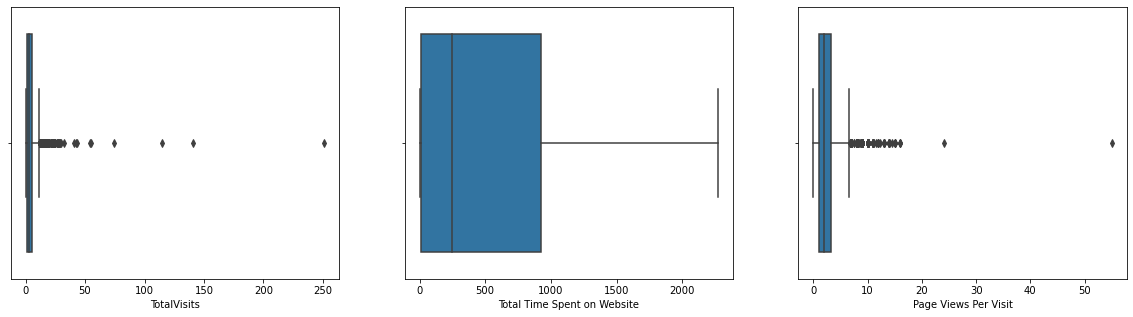

In [128]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.boxplot(df_leads_final["TotalVisits"])

plt.subplot(1,3,2)
sns.boxplot(df_leads_final["Total Time Spent on Website"])

plt.subplot(1,3,3)
sns.boxplot(df_leads_final["Page Views Per Visit"])

plt.show()

#

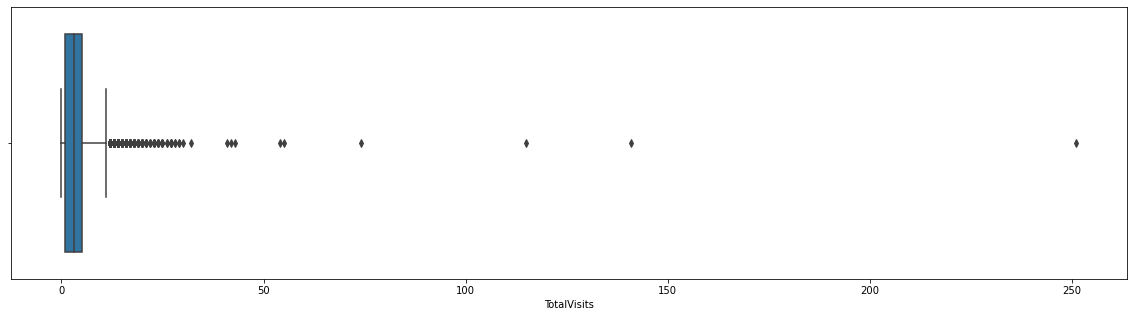

In [129]:
plt.figure(figsize = (20,5))
sns.boxplot(df_leads_final["TotalVisits"])
plt.show()

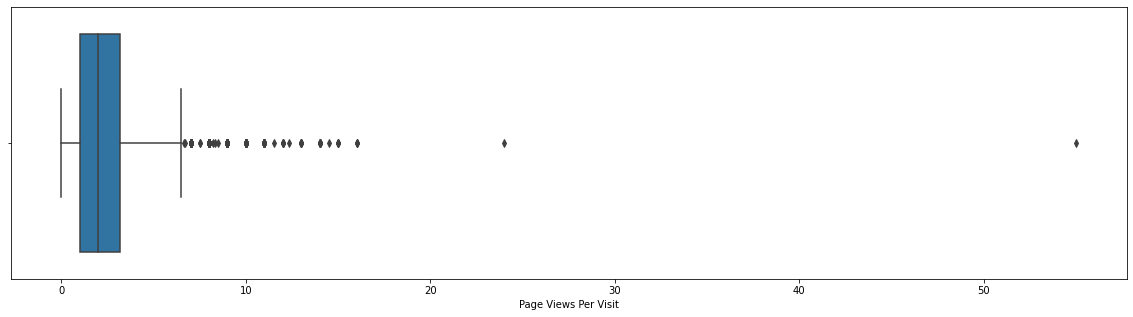

In [130]:
plt.figure(figsize = (20,5))
sns.boxplot(df_leads_final["Page Views Per Visit"])
plt.show()

In [131]:
df_leads_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

#Looking at the mean, SD, count, looks like these won't impact our analysis much so not handling these outliers.

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


### 2.2. Univariate Analysis

#### 2.2.1. Categorical Variables

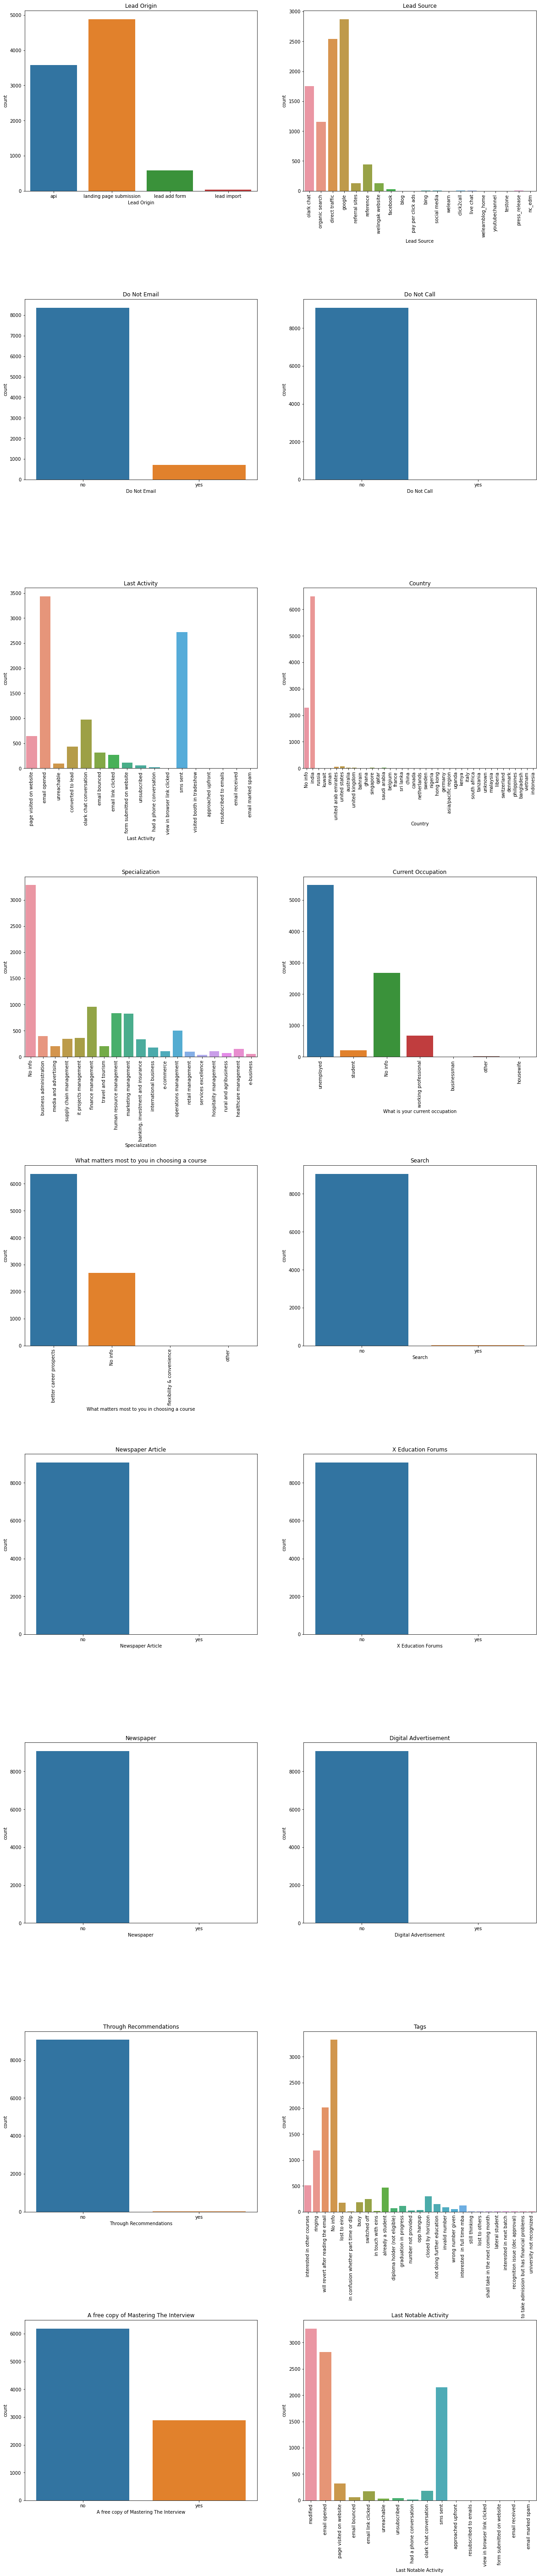

In [132]:
plt.figure(figsize = (20,100))

plt.subplot(9,2,1)
sns.countplot(df_leads_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(9,2,2)
sns.countplot(df_leads_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(9,2,3)
sns.countplot(df_leads_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(9,2,4)
sns.countplot(df_leads_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(9,2,5)
sns.countplot(df_leads_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(9,2,6)
sns.countplot(df_leads_final['Country']).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.subplot(9,2,7)
sns.countplot(df_leads_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(9,2,8)
sns.countplot(df_leads_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

plt.subplot(9,2,9)
sns.countplot(df_leads_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(9,2,10)
sns.countplot(df_leads_final['Search'])
plt.title('Search')

plt.subplot(9,2,11)
sns.countplot(df_leads_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(9,2,12)
sns.countplot(df_leads_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(9,2,13)
sns.countplot(df_leads_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(9,2,14)
sns.countplot(df_leads_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(9,2,15)
sns.countplot(df_leads_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(9,2,16)
sns.countplot(df_leads_final['Tags']).tick_params(axis='x', rotation = 90)
plt.title('Tags')

plt.subplot(9,2,17)
sns.countplot(df_leads_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(9,2,18)
sns.countplot(df_leads_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.subplots_adjust(hspace = 0.6)

plt.show()

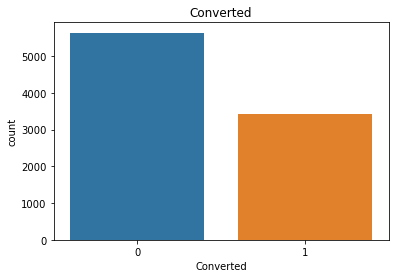

In [133]:
sns.countplot(df_leads_final['Converted'])
plt.title('Converted')
plt.show()

#### 2.2.2. Non Categorical Variables

In [134]:
df_leads_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9074 entries, 0 to 9073
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   index                                          9074 non-null   int64  
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

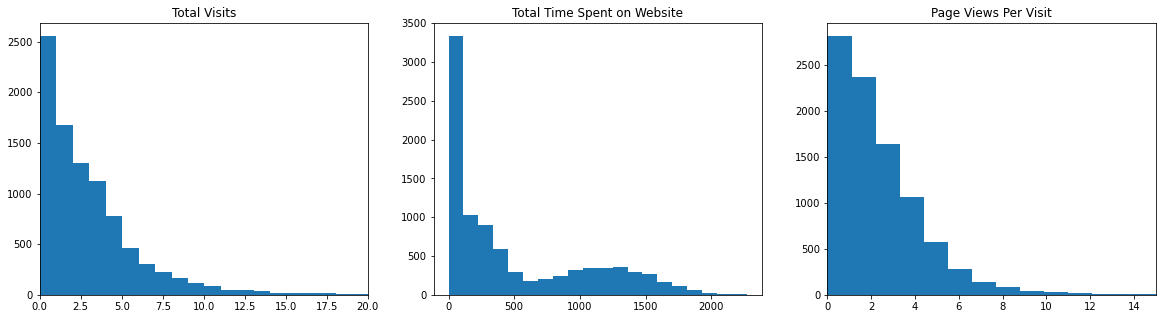

In [135]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
plt.hist(df_leads_final['TotalVisits'], bins = 250)
plt.title('Total Visits')
plt.xlim(0,20)

plt.subplot(1,3,2)
plt.hist(df_leads_final['Total Time Spent on Website'], bins = 20)
plt.title('Total Time Spent on Website')

plt.subplot(1,3,3)
plt.hist(df_leads_final['Page Views Per Visit'], bins = 50)
plt.title('Page Views Per Visit')
plt.xlim(0,15)
plt.show()

### 2.3. Bivariate Analysis

#### Target variable is 'Converted'

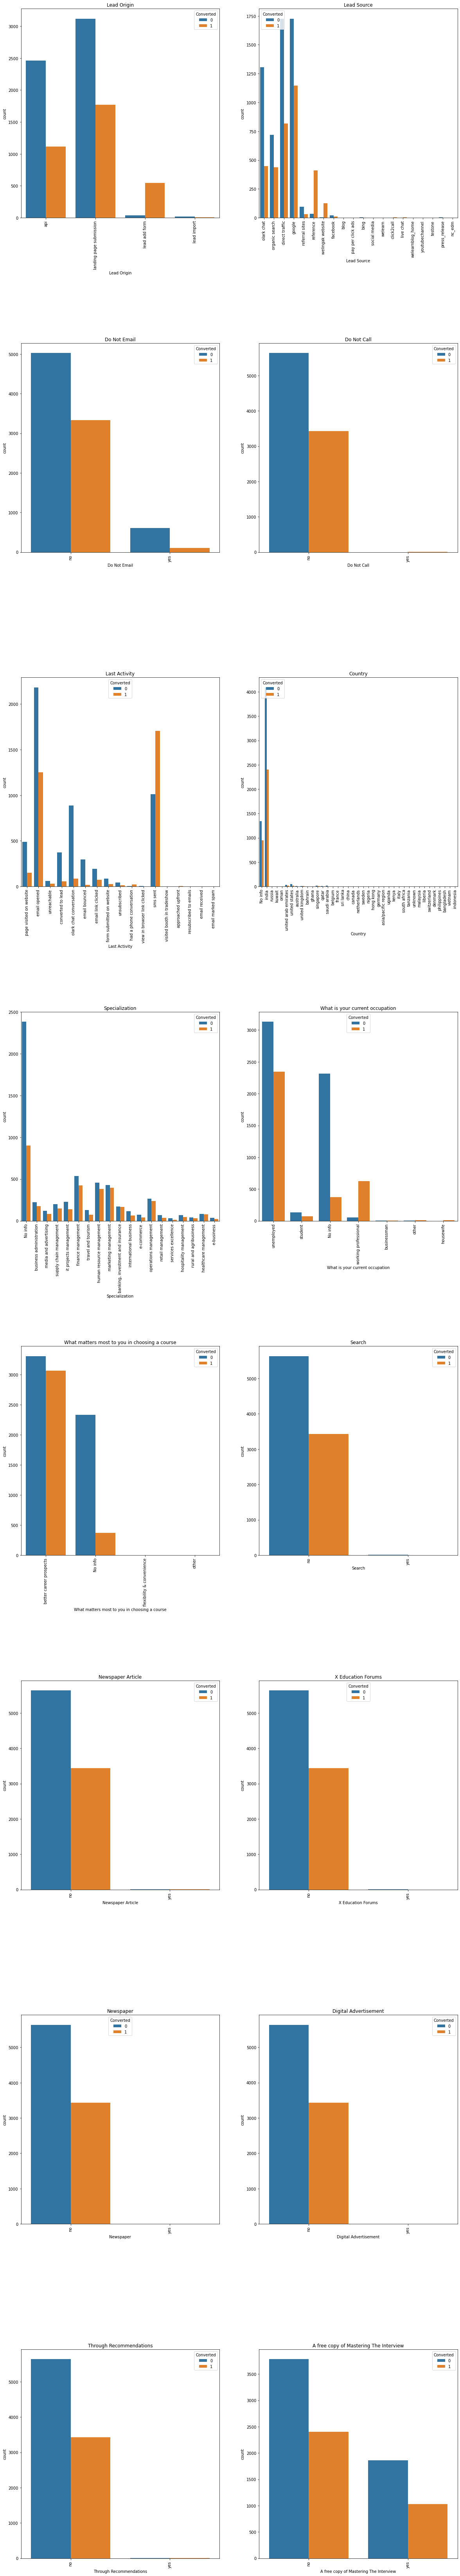

In [136]:
plt.figure(figsize = (20,120))

plt.subplots_adjust(hspace = 0.6)

plt.subplot(8,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(8,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(8,2,3)
sns.countplot(x='Do Not Email', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(8,2,4)
sns.countplot(x='Do Not Call', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')

plt.subplot(8,2,5)
sns.countplot(x='Last Activity', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(8,2,6)
sns.countplot(x='Country', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.subplot(8,2,7)
sns.countplot(x='Specialization', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(8,2,8)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.subplot(8,2,9)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(8,2,10)
sns.countplot(x='Search', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.subplot(8,2,11)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(8,2,12)
sns.countplot(x='X Education Forums', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.subplot(8,2,13)
sns.countplot(x='Newspaper', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(8,2,14)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.subplot(8,2,15)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(8,2,16)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.show()

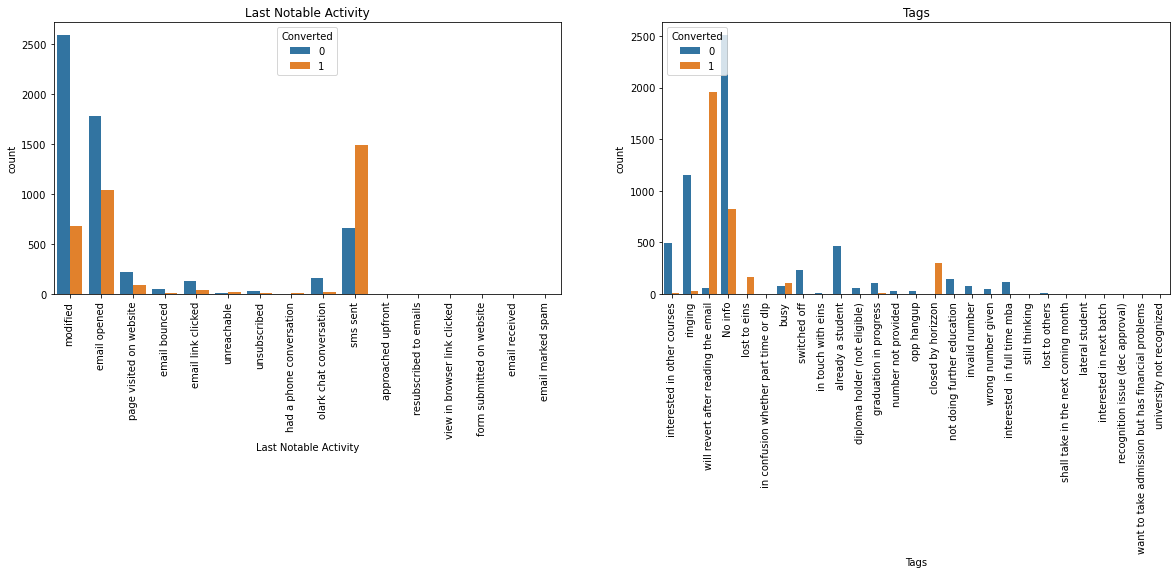

In [137]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.subplot(1,2,2)
sns.countplot(x='Tags', hue='Converted', data= df_leads_final).tick_params(axis='x', rotation = 90)
plt.title('Tags')

plt.show()

### 2.4. Heat Map

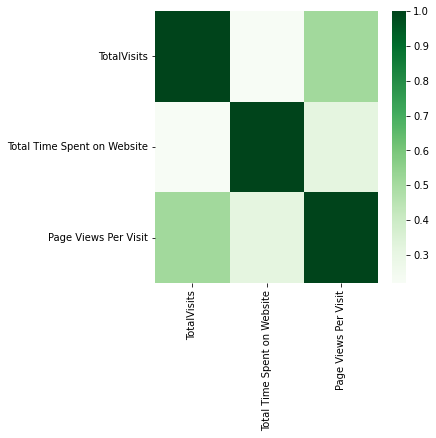

In [138]:
plt.figure(figsize=(5,5))
sns.heatmap(df_leads_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(), cmap="Greens")

plt.show()

## 3. Dummy Variables

In [139]:
df_leads_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9074 entries, 0 to 9073
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   index                                          9074 non-null   int64  
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [140]:
df_leads_final.head(2)

,index,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,0,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,No info,No info,unemployed,better career prospects,no,no,no,no,no,no,interested in other courses,no,modified
1,1,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,No info,unemployed,better career prospects,no,no,no,no,no,no,ringing,no,email opened


In [141]:
# df_leads_final['Tags'].unique()

In [142]:
# replacing no with 0 and yes with 1
df_leads_final['Do Not Email'] = np.where(df_leads_final['Do Not Email'] == 'no', 0, 1)
df_leads_final['Do Not Call'] = np.where(df_leads_final['Do Not Call'] == 'no', 0, 1)
df_leads_final['Search'] = np.where(df_leads_final['Search'] == 'no', 0, 1)
df_leads_final['Newspaper Article'] = np.where(df_leads_final['Newspaper Article'] == 'no', 0, 1)
df_leads_final['X Education Forums'] = np.where(df_leads_final['X Education Forums'] == 'no', 0, 1)
df_leads_final['Newspaper Article'] = np.where(df_leads_final['Newspaper Article'] == 'no', 0, 1)
df_leads_final['Newspaper'] = np.where(df_leads_final['Newspaper'] == 'no', 0, 1)
df_leads_final['Digital Advertisement'] = np.where(df_leads_final['Digital Advertisement'] == 'no', 0, 1)
df_leads_final['Through Recommendations'] = np.where(df_leads_final['Through Recommendations'] == 'no', 0, 1)
df_leads_final['A free copy of Mastering The Interview'] = np.where(df_leads_final['A free copy of Mastering The Interview'] == 'no', 0, 1)

In [143]:
df_leads_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9074 entries, 0 to 9073
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   index                                          9074 non-null   int64  
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   int32  
 5   Do Not Call                                    9074 non-null   int32  
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [144]:
# Creating dummy variables 

leads_final_df = pd.get_dummies(df_leads_final,prefix=['Origin',
                                      'Source',
                                      'Last_Activity',
                                      'Country',
                                      'Specialization',
                                      'current_occupation',
                                      'course_reason',
                                      'Tags',
                                      'Last_Notable_Activity'],columns=['Lead Origin',
                                                             'Lead Source',
                                                             'Last Activity',
                                                             'Country',
                                                             'Specialization',
                                                             'What is your current occupation',
                                                             'What matters most to you in choosing a course',
                                                             'Tags',
                                                             'Last Notable Activity'])

In [145]:
leads_final_df.head(2)

,index,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Origin_api,Origin_landing page submission,Origin_lead add form,Origin_lead import,Source_bing,Source_blog,Source_click2call,Source_direct traffic,Source_facebook,Source_google,Source_live chat,Source_nc_edm,Source_olark chat,Source_organic search,Source_pay per click ads,Source_press_release,Source_reference,Source_referral sites,Source_social media,Source_testone,Source_welearn,Source_welearnblog_home,Source_welingak website,Source_youtubechannel,Last_Activity_approached upfront,Last_Activity_converted to lead,Last_Activity_email bounced,Last_Activity_email link clicked,Last_Activity_email marked spam,Last_Activity_email opened,Last_Activity_email received,Last_Activity_form submitted on website,Last_Activity_had a phone conversation,Last_Activity_olark chat conversation,Last_Activity_page visited on website,Last_Activity_resubscribed to emails,Last_Activity_sms sent,Last_Activity_unreachable,Last_Activity_unsubscribed,Last_Activity_view in browser link clicked,Last_Activity_visited booth in tradeshow,Country_No info,Country_asia/pacific region,Country_australia,Country_bahrain,Country_bangladesh,Country_belgium,Country_canada,Country_china,Country_denmark,Country_france,Country_germany,Country_ghana,Country_hong kong,Country_india,Country_indonesia,Country_italy,Country_kenya,Country_kuwait,Country_liberia,Country_malaysia,Country_netherlands,Country_nigeria,Country_oman,Country_philippines,Country_qatar,Country_russia,Country_saudi arabia,Country_singapore,Country_south africa,Country_sri lanka,Country_sweden,Country_switzerland,Country_tanzania,Country_uganda,Country_united arab emirates,Country_united kingdom,Country_united states,Country_unknown,Country_vietnam,Specialization_No info,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,current_occupation_No info,current_occupation_businessman,current_occupation_housewife,current_occupation_other,current_occupation_student,current_occupation_unemployed,current_occupation_working professional,course_reason_No info,course_reason_better career prospects,course_reason_flexibility & convenience,course_reason_other,Tags_No info,Tags_already a student,Tags_busy,Tags_closed by horizzon,Tags_diploma holder (not eligible),Tags_graduation in progress,Tags_in confusion whether part time or dlp,Tags_in touch with eins,Tags_interested in full time mba,Tags_interested in next batch,Tags_interested in other courses,Tags_invalid number,Tags_lateral student,Tags_lost to eins,Tags_lost to others,Tags_not doing further education,Tags_number not provided,Tags_opp hangup,Tags_recognition issue (dec approval),Tags_ringing,Tags_shall take in the next coming month,Tags_still thinking,Tags_switched off,Tags_university not recognized,Tags_want to take admission but has financial problems,Tags_will revert after reading the email,Tags_wrong number given,Last_Notable_Activity_approached upfront,Last_Notable_Activity_email bounced,Last_Notable_Activity_email link clicked,Last_Notable_Activity_email marked spam,Last_Notable_Activity_email opened,Last_Notable_Activity_email received,Last_Notable_Activity_form submitted on website,Last_Notable_Activity_had a phone

In [146]:
print(leads_final_df.columns.tolist())

['index', 'Lead Number', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview', 'Origin_api', 'Origin_landing page submission', 'Origin_lead add form', 'Origin_lead import', 'Source_bing', 'Source_blog', 'Source_click2call', 'Source_direct traffic', 'Source_facebook', 'Source_google', 'Source_live chat', 'Source_nc_edm', 'Source_olark chat', 'Source_organic search', 'Source_pay per click ads', 'Source_press_release', 'Source_reference', 'Source_referral sites', 'Source_social media', 'Source_testone', 'Source_welearn', 'Source_welearnblog_home', 'Source_welingak website', 'Source_youtubechannel', 'Last_Activity_approached upfront', 'Last_Activity_converted to lead', 'Last_Activity_email bounced', 'Last_Activity_email link clicked', 'Last_Activity_email marked spam', 'Las

In [147]:
leads_final_df.drop(['index','Lead Number'], axis = 1, inplace = True)

### Model Development

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [149]:
X = leads_final_df.drop(['Converted'], axis = 1)
y = leads_final_df['Converted'].copy()

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head(2)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Origin_api,Origin_landing page submission,Origin_lead add form,Origin_lead import,Source_bing,Source_blog,Source_click2call,Source_direct traffic,Source_facebook,Source_google,Source_live chat,Source_nc_edm,Source_olark chat,Source_organic search,Source_pay per click ads,Source_press_release,Source_reference,Source_referral sites,Source_social media,Source_testone,Source_welearn,Source_welearnblog_home,Source_welingak website,Source_youtubechannel,Last_Activity_approached upfront,Last_Activity_converted to lead,Last_Activity_email bounced,Last_Activity_email link clicked,Last_Activity_email marked spam,Last_Activity_email opened,Last_Activity_email received,Last_Activity_form submitted on website,Last_Activity_had a phone conversation,Last_Activity_olark chat conversation,Last_Activity_page visited on website,Last_Activity_resubscribed to emails,Last_Activity_sms sent,Last_Activity_unreachable,Last_Activity_unsubscribed,Last_Activity_view in browser link clicked,Last_Activity_visited booth in tradeshow,Country_No info,Country_asia/pacific region,Country_australia,Country_bahrain,Country_bangladesh,Country_belgium,Country_canada,Country_china,Country_denmark,Country_france,Country_germany,Country_ghana,Country_hong kong,Country_india,Country_indonesia,Country_italy,Country_kenya,Country_kuwait,Country_liberia,Country_malaysia,Country_netherlands,Country_nigeria,Country_oman,Country_philippines,Country_qatar,Country_russia,Country_saudi arabia,Country_singapore,Country_south africa,Country_sri lanka,Country_sweden,Country_switzerland,Country_tanzania,Country_uganda,Country_united arab emirates,Country_united kingdom,Country_united states,Country_unknown,Country_vietnam,Specialization_No info,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,current_occupation_No info,current_occupation_businessman,current_occupation_housewife,current_occupation_other,current_occupation_student,current_occupation_unemployed,current_occupation_working professional,course_reason_No info,course_reason_better career prospects,course_reason_flexibility & convenience,course_reason_other,Tags_No info,Tags_already a student,Tags_busy,Tags_closed by horizzon,Tags_diploma holder (not eligible),Tags_graduation in progress,Tags_in confusion whether part time or dlp,Tags_in touch with eins,Tags_interested in full time mba,Tags_interested in next batch,Tags_interested in other courses,Tags_invalid number,Tags_lateral student,Tags_lost to eins,Tags_lost to others,Tags_not doing further education,Tags_number not provided,Tags_opp hangup,Tags_recognition issue (dec approval),Tags_ringing,Tags_shall take in the next coming month,Tags_still thinking,Tags_switched off,Tags_university not recognized,Tags_want to take admission but has financial problems,Tags_will revert after reading the email,Tags_wrong number given,Last_Notable_Activity_approached upfront,Last_Notable_Activity_email bounced,Last_Notable_Activity_email link clicked,Last_Notable_Activity_email marked spam,Last_Notable_Activity_email opened,Last_Notable_Activity_email received,Last_Notable_Activity_form submitted on website,Last_Notable_Activity_had a phone conversation,Last_Notable_A

#### Scaling numeric columns 

In [151]:
# Min Max Scaling
scaler = MinMaxScaler()
cols = X_train.columns
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]), columns=['TotalVisits','Total Time Spent on Website','Page Views Per Visit'])
scaled_X_train = pd.concat([scaled_X_train, X_train.drop(['TotalVisits','Total Time Spent on Website','Page Views Per Visit'], axis=1).reset_index(drop=True)], axis=1)

scaled_X_test = pd.DataFrame(scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]), columns=['TotalVisits','Total Time Spent on Website','Page Views Per Visit'])
scaled_X_test = pd.concat([scaled_X_test, X_test.drop(['TotalVisits','Total Time Spent on Website','Page Views Per Visit'], axis=1).reset_index(drop=True)], axis=1)

In [152]:
scaled_X_train.head(2)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,Do Not Call,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Origin_api,Origin_landing page submission,Origin_lead add form,Origin_lead import,Source_bing,Source_blog,Source_click2call,Source_direct traffic,Source_facebook,Source_google,Source_live chat,Source_nc_edm,Source_olark chat,Source_organic search,Source_pay per click ads,Source_press_release,Source_reference,Source_referral sites,Source_social media,Source_testone,Source_welearn,Source_welearnblog_home,Source_welingak website,Source_youtubechannel,Last_Activity_approached upfront,Last_Activity_converted to lead,Last_Activity_email bounced,Last_Activity_email link clicked,Last_Activity_email marked spam,Last_Activity_email opened,Last_Activity_email received,Last_Activity_form submitted on website,Last_Activity_had a phone conversation,Last_Activity_olark chat conversation,Last_Activity_page visited on website,Last_Activity_resubscribed to emails,Last_Activity_sms sent,Last_Activity_unreachable,Last_Activity_unsubscribed,Last_Activity_view in browser link clicked,Last_Activity_visited booth in tradeshow,Country_No info,Country_asia/pacific region,Country_australia,Country_bahrain,Country_bangladesh,Country_belgium,Country_canada,Country_china,Country_denmark,Country_france,Country_germany,Country_ghana,Country_hong kong,Country_india,Country_indonesia,Country_italy,Country_kenya,Country_kuwait,Country_liberia,Country_malaysia,Country_netherlands,Country_nigeria,Country_oman,Country_philippines,Country_qatar,Country_russia,Country_saudi arabia,Country_singapore,Country_south africa,Country_sri lanka,Country_sweden,Country_switzerland,Country_tanzania,Country_uganda,Country_united arab emirates,Country_united kingdom,Country_united states,Country_unknown,Country_vietnam,Specialization_No info,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,current_occupation_No info,current_occupation_businessman,current_occupation_housewife,current_occupation_other,current_occupation_student,current_occupation_unemployed,current_occupation_working professional,course_reason_No info,course_reason_better career prospects,course_reason_flexibility & convenience,course_reason_other,Tags_No info,Tags_already a student,Tags_busy,Tags_closed by horizzon,Tags_diploma holder (not eligible),Tags_graduation in progress,Tags_in confusion whether part time or dlp,Tags_in touch with eins,Tags_interested in full time mba,Tags_interested in next batch,Tags_interested in other courses,Tags_invalid number,Tags_lateral student,Tags_lost to eins,Tags_lost to others,Tags_not doing further education,Tags_number not provided,Tags_opp hangup,Tags_recognition issue (dec approval),Tags_ringing,Tags_shall take in the next coming month,Tags_still thinking,Tags_switched off,Tags_university not recognized,Tags_want to take admission but has financial problems,Tags_will revert after reading the email,Tags_wrong number given,Last_Notable_Activity_approached upfront,Last_Notable_Activity_email bounced,Last_Notable_Activity_email link clicked,Last_Notable_Activity_email marked spam,Last_Notable_Activity_email opened,Last_Notable_Activity_email received,Last_Notable_Activity_form submitted on website,Last_Notable_Activity_had a phone conversation,Last_Notable_A

### Recursive Feature Elimination and Cross Validation

By iterating through number of features we will see which model gives highest result.

In [153]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression

In [154]:
def optimal_features(min_val, max_val, scaled_X_train, y_train):
    opt = list()
    for features in range(min_val, max_val):
        log_reg = LogisticRegression(C=2, random_state=42)
        rfe = RFE(log_reg, n_features_to_select = features)
        rfe.fit(scaled_X_train, y_train)
        cols = scaled_X_train.columns[rfe.support_]

        # Cross Validation
        scores = cross_validate(log_reg, scaled_X_train[cols], y_train, return_train_score=True, cv=5, scoring=['accuracy'])
        opt.append((features, scores['test_accuracy'].mean()))
        
    opt = np.array(opt) 
    return opt, opt[opt[:, 1].argmax()]

In [155]:
feat_array, opt_features = optimal_features(10, 30, scaled_X_train, y_train)

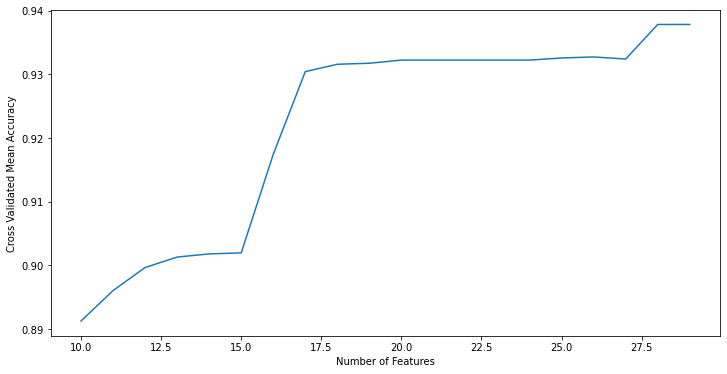

Optimal number of features to use is 28.0 which gives 0.9378202837340265 accuracy.


In [156]:
# plot to show how accuracy changes with number of features considered
plt.figure(figsize=(12, 6))
plt.plot(feat_array[:, 0], feat_array[:, 1])
plt.xlabel("Number of Features")
plt.ylabel("Cross Validated Mean Accuracy")
plt.show()

print(f"Optimal number of features to use is {opt_features[0]} which gives {opt_features[1]} accuracy.")


In [157]:
# RFE
log_reg = LogisticRegression(C=2, random_state=42)
rfe = RFE(log_reg, n_features_to_select = int(opt_features[0]))
rfe.fit(scaled_X_train, y_train)
cols = scaled_X_train.columns[rfe.support_]
print(f"The columns we'll be using are:\n\n{cols}")

The columns we'll be using are:

Index(['TotalVisits', 'Total Time Spent on Website', 'Source_nc_edm',
       'Source_welingak website', 'Last_Activity_sms sent', 'Country_No info',
       'Country_germany', 'Country_qatar', 'course_reason_No info',
       'course_reason_better career prospects', 'Tags_No info',
       'Tags_already a student', 'Tags_busy', 'Tags_closed by horizzon',
       'Tags_diploma holder (not eligible)',
       'Tags_interested  in full time mba', 'Tags_interested in other courses',
       'Tags_invalid number', 'Tags_lateral student', 'Tags_lost to eins',
       'Tags_not doing further education', 'Tags_number not provided',
       'Tags_ringing', 'Tags_switched off',
       'Tags_will revert after reading the email', 'Tags_wrong number given',
       'Last_Notable_Activity_modified',
       'Last_Notable_Activity_olark chat conversation'],
      dtype='object')


### VIF

In [158]:
# import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [159]:
# Manual Elimination by VIF analysis
def get_vif(scaled_X_train, cols):
    vif = pd.DataFrame()
    vif['Features'] = scaled_X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(scaled_X_train[cols].values, i) for i in range(scaled_X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
    
get_vif(scaled_X_train, cols)

,Features,VIF
9,course_reason_better career prospects,35.95
10,Tags_No info,22.15
8,course_reason_No info,20.08
24,Tags_will revert after reading the email,11.74
22,Tags_ringing,7.24
16,Tags_interested in other courses,3.81
11,Tags_already a student,3.38
1,Total Time Spent on Website,2.68
13,Tags_closed by horizzon,2.53
23,Tags_switched off,2.32


The VIF of course_reason_better career prospects sent is too high. We will eliminate the feature and check the VIF again.

In [160]:
cols = cols.drop('course_reason_better career prospects')
get_vif(scaled_X_train, cols).head(15)

,Features,VIF
9,Tags_No info,6.80
8,course_reason_No info,4.98
1,Total Time Spent on Website,2.61
23,Tags_will revert after reading the email,2.48
5,Country_No info,2.12
25,Last_Notable_Activity_modified,1.84
0,TotalVisits,1.78
4,Last_Activity_sms sent,1.68
21,Tags_ringing,1.41
15,Tags_interested in other courses,1.33


The VIF of Tags_No info is too high. We will eliminate the feature and check the VIF again.

In [165]:
#cols = cols.drop('Tags_No info')
get_vif(scaled_X_train, cols)

,Features,VIF
1,Total Time Spent on Website,2.30
22,Tags_will revert after reading the email,2.08
8,course_reason_No info,1.94
24,Last_Notable_Activity_modified,1.80
5,Country_No info,1.78
0,TotalVisits,1.68
4,Last_Activity_sms sent,1.62
20,Tags_ringing,1.31
14,Tags_interested in other courses,1.24
11,Tags_closed by horizzon,1.18


### Assessing the model with Statmodel

In [166]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score

In [167]:
import statsmodels.api as sm

In [171]:
pd.get_option("display.max_columns")

In [172]:
pd.set_option("display.max_columns", None)

In [173]:
scaled_X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,Do Not Call,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Origin_api,Origin_landing page submission,Origin_lead add form,Origin_lead import,Source_bing,Source_blog,Source_click2call,Source_direct traffic,Source_facebook,Source_google,Source_live chat,Source_nc_edm,Source_olark chat,Source_organic search,Source_pay per click ads,Source_press_release,Source_reference,Source_referral sites,Source_social media,Source_testone,Source_welearn,Source_welearnblog_home,Source_welingak website,Source_youtubechannel,Last_Activity_approached upfront,Last_Activity_converted to lead,Last_Activity_email bounced,Last_Activity_email link clicked,Last_Activity_email marked spam,Last_Activity_email opened,Last_Activity_email received,Last_Activity_form submitted on website,Last_Activity_had a phone conversation,Last_Activity_olark chat conversation,Last_Activity_page visited on website,Last_Activity_resubscribed to emails,Last_Activity_sms sent,Last_Activity_unreachable,Last_Activity_unsubscribed,Last_Activity_view in browser link clicked,Last_Activity_visited booth in tradeshow,Country_No info,Country_asia/pacific region,Country_australia,Country_bahrain,Country_bangladesh,Country_belgium,Country_canada,Country_china,Country_denmark,Country_france,Country_germany,Country_ghana,Country_hong kong,Country_india,Country_indonesia,Country_italy,Country_kenya,Country_kuwait,Country_liberia,Country_malaysia,Country_netherlands,Country_nigeria,Country_oman,Country_philippines,Country_qatar,Country_russia,Country_saudi arabia,Country_singapore,Country_south africa,Country_sri lanka,Country_sweden,Country_switzerland,Country_tanzania,Country_uganda,Country_united arab emirates,Country_united kingdom,Country_united states,Country_unknown,Country_vietnam,Specialization_No info,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,current_occupation_No info,current_occupation_businessman,current_occupation_housewife,current_occupation_other,current_occupation_student,current_occupation_unemployed,current_occupation_working professional,course_reason_No info,course_reason_better career prospects,course_reason_flexibility & convenience,course_reason_other,Tags_No info,Tags_already a student,Tags_busy,Tags_closed by horizzon,Tags_diploma holder (not eligible),Tags_graduation in progress,Tags_in confusion whether part time or dlp,Tags_in touch with eins,Tags_interested in full time mba,Tags_interested in next batch,Tags_interested in other courses,Tags_invalid number,Tags_lateral student,Tags_lost to eins,Tags_lost to others,Tags_not doing further education,Tags_number not provided,Tags_opp hangup,Tags_recognition issue (dec approval),Tags_ringing,Tags_shall take in the next coming month,Tags_still thinking,Tags_switched off,Tags_university not recognized,Tags_want to take admission but has financial problems,Tags_will revert after reading the email,Tags_wrong number given,Last_Notable_Activity_approached upfront,Last_Notable_Activity_email bounced,Last_Notable_Activity_email link clicked,Last_Notable_Activity_email marked spam,Last_Notable_Activity_email opened,Last_Notable_Activity_email received,Last_Notable_Activity_form submitted on website,Last_Notable_Activity_had a phone conversation,Last_Notable_A

In [174]:
#to_drop = ['Source_welingak website','Last_Activity_resubscribed to emails']
#X_train_sm = sm.add_constant(scaled_X_train[cols].drop(to_drop, axis=1))
X_train_sm = sm.add_constant(scaled_X_train[cols])
logm2 = sm.GLM(list(y_train), X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6079
Model:                            GLM   Df Residuals:                     6052
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1019.7
Date:                Wed, 19 Oct 2022   Deviance:                       2039.5
Time:                        10:21:19   Pearson chi2:                 1.06e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6274
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4465      0.167     -8.665      0.000      -1.774      -1.119
TotalVisits                                       7.0102      2.800      2.503      0.012       1.521      12.499
Total Time Spent on Website                       4.7823      0.286     16.748      0.000       4.223       5.342
Source_nc_edm                                    27.0689   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Source_welingak website                           3.5414      1.029      3.442      0.001       1.525       5.558
Last_Activity_sms sent                            2.0621      0.134     15.432      0.000       1.800       2.324
Country_No info                                   1.4613      0.172      8.510      0.000       1.125       1.798
Country_germany                                   3.6607      1.254      2.919      0.004       1.203       6.119
Country_qatar                                    -2.1518      1.415     -1.520      0.128      -4.926       0.622
course_reason_No info                            -2.2281      0.149    -14.947      0.000      -2.520      -1.936
Tags_already a student                           -5.5345      1.017     -5.441      0.000      -7.528      -3.541
Tags_busy                                        -0.6173      0.261     -2.361      0.018      -1.130      -0.105
Tags_closed by horizzon                           5.4481      0.734      7.420      0.000       4.009       6.887
Tags_diploma holder (not eligible)              -25.3511   3.25e+04     -0.001      0.999   -6.36e+04    6.36e+04
Tags_interested  in full time mba                -3.5094      0.772     -4.546      0.000      -5.023      -1.996
Tags_interested in other courses                 -3.3719      0.399     -8.461      0.000      -4.153      -2.591
Tags_invalid number                             -26.0630   2.51e+04     -0.001      0.999   -4.93e+04    4.92e+04
Tags_lateral student                             24.5732   1.47e+05      0.000      1.000   -2.89e+05    2.89e+05
Tags_lost to eins                                 5.8418      0.761      7.677      0.000       4.350       7.333
Tags_not doing further education                 -4.2055      1.028     -4.093      0.000      -6.219      -2.191
Tags_number not provided                        -27.1949   4.47e+04     -0.001      1.000   -8.76e+04    8.76e+04
Tags_ringing                                     -4.9022      0.275    -17.836      0.000      -5.441      -4.364
Tags_switched off                                -5.5542      0.640     -8.682      0.000      -6.808      -4.300
Tags_will revert after reading the email          3.2770      0.214     15.312      0.000       2.858       3.696
Tags_

### Fitting the model

In [175]:
# Cross Validation
scores = cross_validate(log_reg, scaled_X_train[cols], y_train, return_train_score=True, cv=5, scoring=['accuracy'])
print(f"Cross validated mean accuracy: {round(scores['test_accuracy'].mean(), 3)}")

log_reg.fit(scaled_X_train[cols], y_train)
pred = log_reg.predict(scaled_X_train[cols])
prob_est = log_reg.predict_proba(scaled_X_train[cols])

Cross validated mean accuracy: 0.932


Sensitivity (Recall): 0.8779631255487269
Specificity: 0.9663246514075243
Precision: 0.9398496240601504
F-Score: 0.9078529278256923


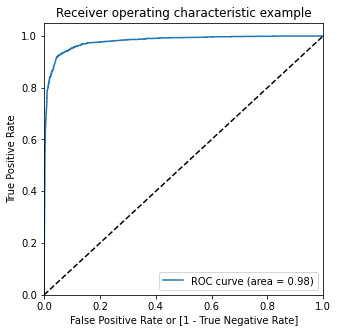

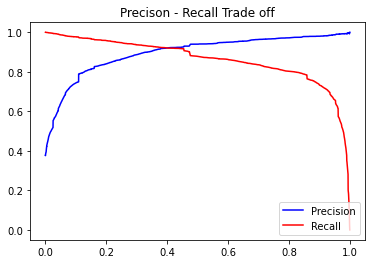

In [176]:
def plot_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

def plot_prec_recall(actual_values, probability_estimates):
    
    p, r, thresholds = precision_recall_curve(actual_values, probability_estimates)
    plt.plot(thresholds, p[:-1], "b-", label="Precision")
    plt.plot(thresholds, r[:-1], "r-", label="Recall")
    plt.title("Precison - Recall Trade off")
    plt.legend(loc="lower right")
    plt.show()
    
    
def get_metrics(y, pred, prob_est):
    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y, pred).ravel()
    precision = precision_score(y, pred)
    recall = recall_score(y, pred)
    f = f1_score(y, pred)

    # Sensitivity, Specificity
    print(f"Sensitivity (Recall): {recall}\nSpecificity: {tn/(tn+fp)}\nPrecision: {precision}\nF-Score: {f}")

    # Reciever Operating Characteristic Curve
    plot_roc(y, prob_est[:, 1])

    # Precision Recall Curve
    plot_prec_recall(y, prob_est[:, 1])
    
    
# get_metrics(y_train, clf.predict(X_test), clf.predict_proba(X_test))
get_metrics(y_train, pred, prob_est)

### Finding optimal cutoff value

In [177]:
# Making y_train_pred_final
y_train_pred_final = pd.DataFrame({'Converted':y_train, 'probability': prob_est[:, 1]})
numbers = np.round(np.linspace(0,1,40,endpoint=False), 2)
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.probability.map(lambda x: 1 if x > i else 0)

# Making cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = np.round(np.linspace(0,1,40,endpoint=False), 2)
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df['var'] = np.var([cutoff_df.accuracy, cutoff_df.sensi, cutoff_df.speci], axis=0)

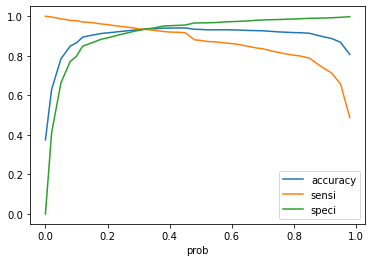

Optimum cut-off value is: 0.32


In [178]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

cutoff_value = cutoff_df.sort_values('var').head(1)['prob'].values[0]
print(f"Optimum cut-off value is: {cutoff_value}")

Accuracy: 0.9343642046389209
Sensitivity (Recall): 0.9337137840210711
Specificity: 0.9347540121020784
Precision: 0.895578947368421
F-Score: 0.9142488716956801


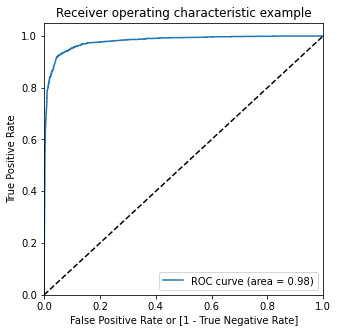

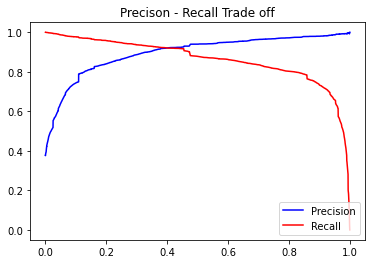

In [179]:
# new predicted values based on cut-off
pred = (log_reg.predict_proba(scaled_X_train[cols])[:, 1] >= cutoff_value).astype(int)
print(f"Accuracy: {accuracy_score(y_train, pred)}")
get_metrics(y_train, pred, prob_est)

### Performance against Test Set

accuracy: 0.9295492487479132
Sensitivity (Recall): 0.9377700950734659
Specificity: 0.9243743199129488
Precision: 0.886437908496732
F-Score: 0.9113817723645525


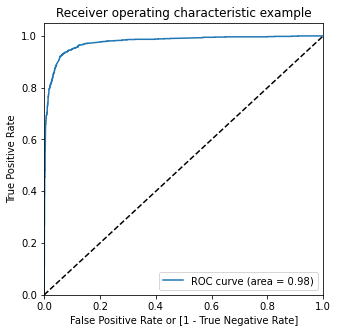

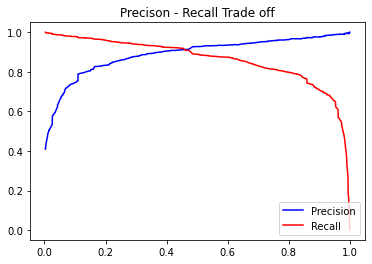

In [180]:
# Scoring against Test Set
log_reg.fit(scaled_X_train[cols], y_train)
pred = (log_reg.predict_proba(scaled_X_test[cols])[:, 1] >= cutoff_value).astype(int)
prob_est = log_reg.predict_proba(scaled_X_test[cols])
print(f"accuracy: {accuracy_score(y_test, pred)}")
get_metrics(y_test, pred, prob_est)